In [1]:
%load_ext autoreload
%load_ext autotime

time: 329 µs (started: 2024-05-10 04:00:12 +00:00)


In [2]:
import os
from dotenv import find_dotenv, load_dotenv

env_file = find_dotenv()
load_dotenv(env_file)

True

time: 14.4 ms (started: 2024-05-10 04:00:12 +00:00)


In [3]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from pathlib import Path
from dlp_analyzer.main import (
    DLPAnalyzer,
    setup_dask_cluster,
    setup_logging,
    update_dlp_configuration,
    get_dlp_configuration,
)
from dlp_analyzer.plots import DLPAnalyzerPlots

plt.style.use("seaborn-v0_8-poster")
warnings.filterwarnings("ignore")

time: 4.35 s (started: 2024-05-10 04:00:12 +00:00)


In [4]:
update_dlp_configuration(
    debug=False,
    skip_hostname=True,
    time_approximate=True,
    time_granularity=30e6,
    # time_granularity=80e6,
    verbose=True,
    workers=2,
)

setup_logging()

time: 2.97 ms (started: 2024-05-10 04:00:17 +00:00)


In [5]:
# %autoreload 2

setup_dask_cluster()

[INFO] [04:00:19] Initialized Client with 2 workers and link http://127.0.0.1:8787/status [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:957]


time: 2.43 s (started: 2024-05-10 04:00:17 +00:00)


In [6]:
get_dlp_configuration().time_granularity

30000000.0

time: 2.69 ms (started: 2024-05-10 04:00:19 +00:00)


In [7]:
%autoreload 2

# trace_path = "/grand/ReForMerS/llm-profiler/log/5-epochs_4-workers_not-pinned_persistent/mnist/*.pfw"
# trace_path = "/grand/ReForMerS/llm-profiler/log/dlio/*.pfw"
trace_path = "/grand/ReForMerS/llm-profiler/*.pfw"
output_path = Path(trace_path).parent / "plots"
output_path.mkdir(exist_ok=True, parents=True)

analyzer = DLPAnalyzer(trace_path)
analyzer

[INFO] [04:00:19] Created index for 0 files [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:436]
[INFO] [04:00:19] Total size of all files are <dask.bag.core.Item object at 0x7f5bdc999790> bytes [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:438]
[INFO] [04:00:22] Loaded events [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:522]
[INFO] [04:00:22] Loaded plots with slope threshold: 45 [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:528]


time: 2.3 s (started: 2024-05-10 04:00:19 +00:00)


In [8]:
analyzer.events.head()

,name,cat,pid,tid,ts,te,dur,tinterval,trange,hostname,compute_time,io_time,app_io_time,total_time,filename,phase,size
0,open64,POSIX,641268,1282536,0,2556,2556,<NA>,0.0,x3006c0s13b1n0,<NA>,2556,<NA>,2556,/lus/grand/projects/ReForMerS/llm-profiler/dat...,2,<NA>
1,__fxstat64,POSIX,641268,1282536,3583,3815,232,<NA>,0.0,x3006c0s13b1n0,<NA>,232,<NA>,232,/lus/grand/projects/ReForMerS/llm-profiler/dat...,2,<NA>
2,lseek64,POSIX,641268,1282536,3844,3846,2,<NA>,0.0,x3006c0s13b1n0,<NA>,2,<NA>,2,/lus/grand/projects/ReForMerS/llm-profiler/dat...,2,<NA>
3,lseek64,POSIX,641268,1282536,3866,3867,1,<NA>,0.0,x3006c0s13b1n0,<NA>,1,<NA>,1,/lus/grand/projects/ReForMerS/llm-profiler/dat...,2,<NA>
4,lseek64,POSIX,641268,1282536,3894,3895,1,<NA>,0.0,x3006c0s13b1n0,<NA>,1,<NA>,1,/lus/grand/projects/ReForMerS/llm-profiler/dat...,2,<NA>


time: 49 ms (started: 2024-05-10 04:00:22 +00:00)


In [9]:
%autoreload 2
analyzer.summary()

[INFO] [04:00:22] Total number of events in the workload are 127 [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:717]


Index(['name', 'cat', 'pid', 'tid', 'ts', 'te', 'dur', 'tinterval', 'trange',
       'hostname', 'compute_time', 'io_time', 'app_io_time', 'total_time',
       'filename', 'phase', 'size'],
      dtype='object')


[INFO] [04:00:23] Approximate True 4283702, 4802.0, 0.0, 0.0,                4802.0, 0.0, 0.0, 0.0 [/lus/grand/projects/ReForMerS/llm-profiler/dlp_analyzer/main.py:661]


2024-05-10 04:00:23,555 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 892fe5992ac11ff6edb2318ebe857a04 initialized by task ('shuffle-transfer-892fe5992ac11ff6edb2318ebe857a04', 0) executed on worker tcp://127.0.0.1:40905
2024-05-10 04:00:23,559 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle f00324e0d484d479a9804727c49c1b9a initialized by task ('shuffle-transfer-f00324e0d484d479a9804727c49c1b9a', 0) executed on worker tcp://127.0.0.1:40905
2024-05-10 04:00:23,561 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 5a600b6862178dca02f813f88d8b4fe4 initialized by task ('shuffle-transfer-5a600b6862178dca02f813f88d8b4fe4', 0) executed on worker tcp://127.0.0.1:40905
2024-05-10 04:00:23,594 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 46560593c6368207d657d8737551e644 initialized by task ('shuffle-transfer-46560593c6368207d657d8737551e644', 0) executed on worker tcp://127.0.0.1:40905
2024-05-10 04:00:23,597 - distributed.shuffle._scheduler_plu

{'open64': {('dur', 'sum'): 11720, ('dur', 'count'): 7, ('size', 'sum'): 0, ('size', 'mean'): nan, ('size', 'median'): None, ('size', 'min'): None, ('size', 'max'): None, ('size', 'percentile_25'): nan, ('size', 'percentile_75'): nan}, '__fxstat64': {('dur', 'sum'): 1753, ('dur', 'count'): 7, ('size', 'sum'): 0, ('size', 'mean'): nan, ('size', 'median'): None, ('size', 'min'): None, ('size', 'max'): None, ('size', 'percentile_25'): nan, ('size', 'percentile_75'): nan}, 'lseek64': {('dur', 'sum'): 55, ('dur', 'count'): 45, ('size', 'sum'): 0, ('size', 'mean'): nan, ('size', 'median'): None, ('size', 'min'): None, ('size', 'max'): None, ('size', 'percentile_25'): nan, ('size', 'percentile_75'): nan}, 'write': {('dur', 'sum'): 1640, ('dur', 'count'): 18, ('size', 'sum'): 656575, ('size', 'mean'): 36476.38888888889, ('size', 'median'): 61747.0, ('size', 'min'): 30, ('size', 'max'): 65719, ('size', 'percentile_25'): 55.0, ('size', 'percentile_75'): 65520.0}, 'close': {('dur', 'sum'): 1208, 

╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  Allocation    Scheduler Allocation Details                                                                     │
│                ├── Nodes: 1                                                                                     │
│                ├── Processes: 2                                                                                 │
│                ├── Thread allocations across nodes (includes dynamically created threads)                       │
│                │   ├── Compute: 0                                                                               │
│                │   └── I/O: 6                                                                                   │
│                └── Events Recorded: 127                                                                         │
│  Dataset       Description of Dataset Used                                                                      │
│                └── Files: 26                                                                                    │
│  I/O Behavior  Behavior of Application                                                                          │
│                ├── Split of Time in application                                                                 │
│                │   ├── Total Time: 4.284 sec                                                                    │
│                │   └── Overall I/O: 0.005 sec                                                                   │
│                └── Metrics by function                                                                          │
│                    ├── Function       |count |                  size                   |                        │
│                    ├──                |      |min   |25    |mean  |median|75    |max   |                        │
│                    ├── open64         |7     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __fxstat64     |7     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── lseek64        |45    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── write          |18    |30    |55    |36KB  |60KB  |64KB  |64KB  |                        │
│                    ├── close          |7     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __xstat64      |2     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── __lxstat64     |2     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── unlink         |19    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── read           |2     |NA    |143KB |284KB |284KB |427KB |568KB |                        │
│                    └── link           |12    |NA    |nan   |nan   |NA    |nan   |NA    |                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

time: 1.75 s (started: 2024-05-10 04:00:22 +00:00)


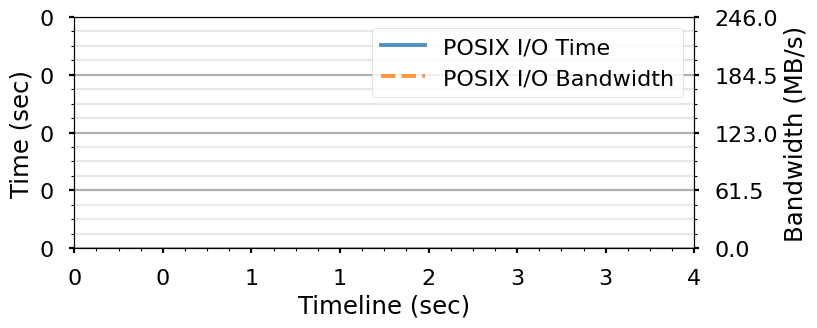

time: 1.6 s (started: 2024-05-10 04:00:24 +00:00)


In [10]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit="mb",
    figsize=(8, 3),
    line1_label="POSIX I/O Time",
    line2_label="POSIX I/O Bandwidth",
    time_col="io_time",
    x_num_ticks=8,
    y_num_ticks=5,
)

In [11]:
fig.savefig(output_path / "posix_io_time.png", dpi=300, bbox_inches="tight")
fig.savefig(
    output_path / "posix_io_time.pdf", dpi=300, format="pdf", bbox_inches="tight"
)

time: 889 ms (started: 2024-05-10 04:00:25 +00:00)


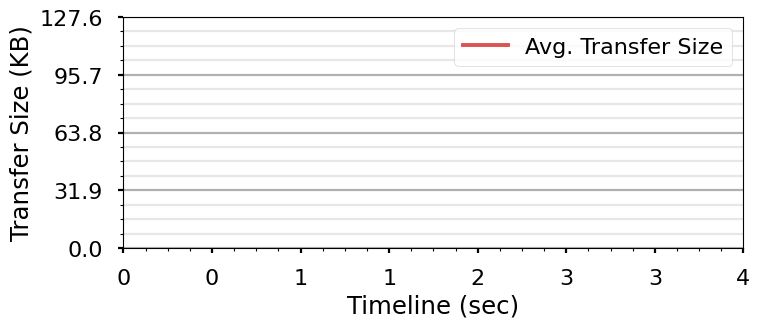

time: 1.33 s (started: 2024-05-10 04:00:26 +00:00)


In [12]:
fig, ax = analyzer.plots.xfer_size_timeline(
    figsize=(8, 3),
    unit="kb",
    x_num_ticks=8,
)

In [13]:
fig.savefig(output_path / "xfer_size.png", dpi=300, bbox_inches="tight")
fig.savefig(output_path / "xfer_size.pdf", dpi=300, format="pdf", bbox_inches="tight")

time: 509 ms (started: 2024-05-10 04:00:28 +00:00)
